[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Lecture_Code/1_1_Basic%20EDA.ipynb)


I like putting all my libraries I use in one spot near the top. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

The channing data set is for a nursing home called the Channing House. In 1975 data was collected on how old people were when they entered and exited. The variable cens is equal to 1 if they were alive when the data was collected.

In [ ]:
channing = pd.read_csv("https://richardson.byu.edu/220/channing.csv")
channing.head(10)

,Unnamed: 0,sex,entry,exit,time,cens
0,1,Male,782,909,127,1
1,2,Male,1020,1128,108,1
2,3,Male,856,969,113,1
3,4,Male,915,957,42,1
4,5,Male,863,983,120,1
5,6,Male,906,1012,106,1
6,7,Male,955,1055,100,1
7,8,Male,943,1025,82,1
8,9,Male,943,1043,100,1
9,10,Male,837,945,108,1


Find the number of rows and columns of a data set

In [ ]:
channing.shape

(462, 6)

A Frequency distribution is just a list of all the values of a variable and how often they occur. Try other variables here. For the continuous ones, it is not as helpful.

In [ ]:
# Construct a frequency distribution
frequency_distribution = channing["time"].value_counts().sort_index()
frequency_distribution

,count
time,
0,4
1,1
2,5
3,5
4,5
...,...
132,2
133,1
135,3


For continuous variables, a histogram bins values together creating what is essentially a frequency distribution for binned values of the data.

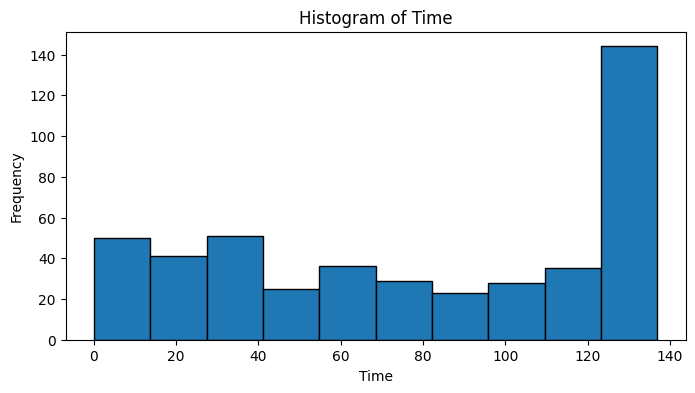

In [ ]:

# Construct a histogram
plt.figure(figsize=(8, 4))
plt.hist(channing["time"], bins=10, edgecolor='black')
plt.title(f'Histogram of Time')
plt.xlabel("Time")
plt.ylabel('Frequency')
plt.show()

Numerical values such as mean, median, standard deviation, and variance are helpful.

In [ ]:

# Calculate mean, median, and standard deviation
mean_value = np.mean(channing["time"])
median_value = np.median(channing["time"])
std_deviation = np.std(channing["time"])
variance = np.var(channing["time"])

# Display the results
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Standard Deviation: {std_deviation}")
print(f"Variance: {variance}")

Mean: 80.33549783549783
Median: 82.0
Standard Deviation: 48.226086370037756
Variance: 2325.7554065703416


A five number summary is the minimum, maximum, then the 25th, 50th, and 75th percentile of the data.

In [ ]:
# Calculate the five-number summary
minimum = np.min(channing["time"])
q1 = np.percentile(channing["time"], 25)
median = np.median(channing["time"])
q3 = np.percentile(channing["time"], 75)
maximum = np.max(channing["time"])

# Display the five-number summary
print(f"Minimum: {minimum}")
print(f"1st Quartile (Q1): {q1}")
print(f"Median (Q2): {median}")
print(f"3rd Quartile (Q3): {q3}")
print(f"Maximum: {maximum}")

Minimum: 0
1st Quartile (Q1): 35.0
Median (Q2): 82.0
3rd Quartile (Q3): 137.0
Maximum: 137


You can get all of these values using decribe.

In [ ]:
channing["time"].describe()

,time
count,462.000000
mean,80.335498
std,48.278364
min,0.000000
25%,35.000000
50%,82.000000
75%,137.000000
max,137.000000


In [ ]:
channing.describe(include = "all")

,Unnamed: 0,sex,entry,exit,time,cens
count,462.000000,462,462.000000,462.000000,462.000000,462.000000
unique,NaN,2,NaN,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN,NaN
freq,NaN,365,NaN,NaN,NaN,NaN
mean,231.500000,NaN,905.878788,985.993506,80.335498,0.380952
std,133.512172,NaN,69.318862,73.767957,48.278364,0.486147
min,1.000000,NaN,733.000000,777.000000,0.000000,0.000000
25%,116.250000,NaN,854.000000,939.000000,35.000000,0.000000
50%,231.500000,NaN,900.500000,990.000000,82.000000,0.000000
75%,346.750000,NaN,956.000000,1031.000000,137.000000,1.000000


A boxplot displays the five number summary.

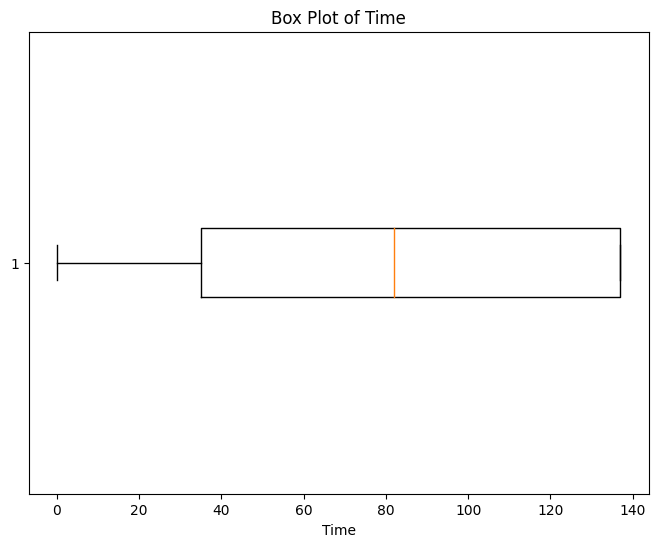

In [ ]:
# Construct a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(channing["time"], vert=False)
plt.title(f'Box Plot of Time')
plt.xlabel("Time")
plt.show()

A boxplot by itself is less useful than a histogram, but side by side boxplots are great ways to see differences between distributions by characteristics of the population.

<Figure size 800x600 with 0 Axes>

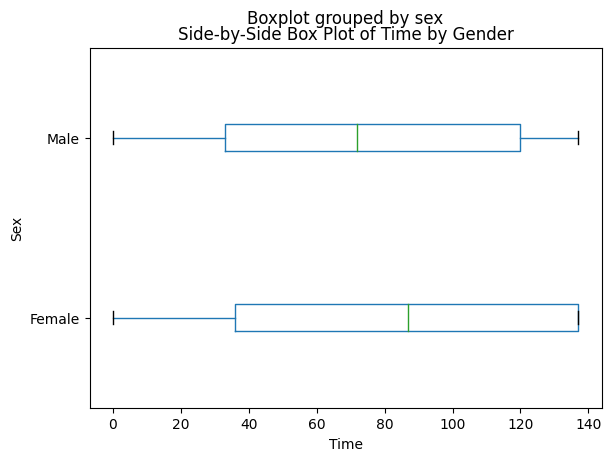

In [ ]:
plt.figure(figsize=(8, 6))
channing.boxplot(column='time', by='sex', vert=False,grid = False)
plt.title('Side-by-Side Box Plot of Time by Gender')
plt.xlabel('Time')
plt.ylabel('Sex')
plt.show()

We can get summary statistics by certain groups.

In [ ]:
mean_time_by_sex = channing.groupby('sex')['time'].mean()
mean_time_by_sex

,time
sex,
Female,82.112329
Male,73.649485


For two continuous variables we can visualize using a scatterplot.

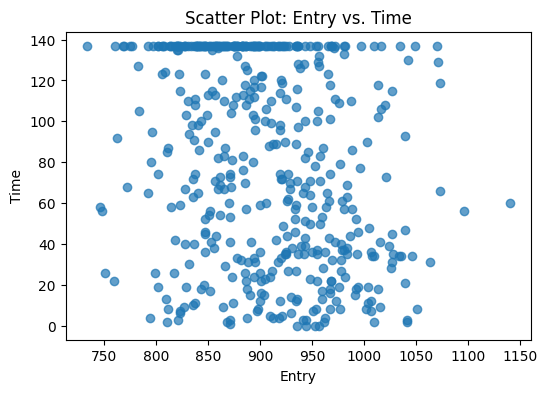

In [ ]:
# Create a scatter plot between "entry" and "time"
plt.figure(figsize=(6, 4))
plt.scatter(channing['entry'], channing['time'], alpha=0.7)
plt.title('Scatter Plot: Entry vs. Time')
plt.xlabel('Entry')
plt.ylabel('Time')

plt.show()

Two ways to measure relationships between continuous variables is correlation and regression.

In [ ]:
# Calculate the correlation between "entry" and "time"
correlation = channing['entry'].corr(channing['time'])

print(f'Correlation between Entry and Time: {correlation}')

Correlation between Entry and Time: -0.25469957154249145


In [ ]:
x = channing[['entry']]
y = channing['time']

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(x, y)

# Retrieve the coefficient (slope) and intercept of the linear regression
slope = model.coef_[0]
intercept = model.intercept_

# Print the regression results
print(f'Slope (Coefficient): {slope}')
print(f'Intercept: {intercept}')

Slope (Coefficient): -0.17739008298434142
Intercept: 241.0294111910706


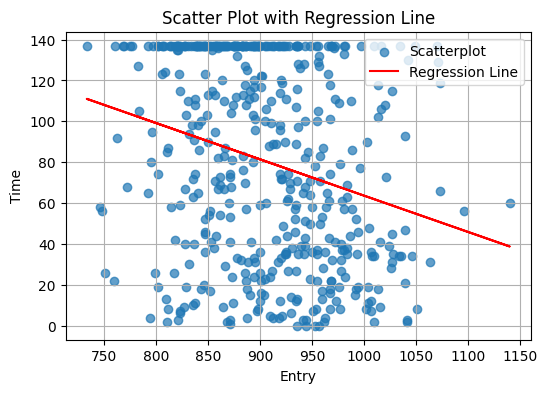

In [ ]:
# Plot the scatterplot
plt.figure(figsize=(6, 4))
plt.scatter(x, y, alpha=0.7, label='Scatterplot')

# Plot the regression line
plt.plot(x, model.predict(x), color='red', label='Regression Line')

plt.title('Scatter Plot with Regression Line')
plt.xlabel('Entry')
plt.ylabel('Time')
plt.legend()
plt.grid(True)
plt.show()

Comparing categorical with categorical using contingency table

In [ ]:
pd.crosstab(channing["sex"],channing["cens"])

cens,0,1
sex,,
Female,235,130
Male,51,46


Contingency table with proportions insetad of counts

In [ ]:
pd.crosstab(channing["sex"],channing["cens"], normalize = "index")

cens,0,1
sex,,
Female,0.643836,0.356164
Male,0.525773,0.474227
